In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymatgen.entries.computed_entries import Composition
import numpy as np
from shapely.geometry import LineString
from itertools import combinations, permutations
import seaborn as sns
from matplotlib.ticker import FuncFormatter, FormatStrFormatter
from matplotlib import ticker
import itertools
import create_CL

/Users/tolstop/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<h3>Analysis of decomposition energy of predicted materials</h3>

In [2]:
df = pd.read_csv('new_materials_database.csv')

In [3]:
def get_metal_type(composition_str):
    metal_type_list = []

    elements = Composition(composition_str).elements
    for element in elements:
        if element.symbol == 'S':
            continue  # Skip 'S'
        # Check the metal type based on the element
        if element.is_transition_metal:
            metal_type = 'Transition'
        elif element.is_alkali:
            metal_type = 'Alkali'
        elif element.is_alkaline:
            metal_type = 'Alkaline'
        elif element.is_post_transition_metal:
            metal_type = 'Post Transition'
        elif element.is_metalloid:
            metal_type = 'Metalloid'
        elif element.is_lanthanoid:
            metal_type = 'Lanthanoid'
        metal_type_list.append(metal_type)
        metal_type_list = sorted(metal_type_list)
    return metal_type_list

df['Metal_Type'] = df['pretty_formula'].apply(get_metal_type)
df['Metal_Type_Str'] = df['Metal_Type'].apply(lambda row: '/'.join(row))

/var/folders/66/8zx0tncn3gs_xhq4jl2nn7lrrs3zm3/T/ipykernel_93974/2233102155.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_metal_df['Metal_Type_Str'] = pd.Categorical(fixed_metal_df['Metal_Type_Str'], categories=sorted_metal_df, ordered=True)


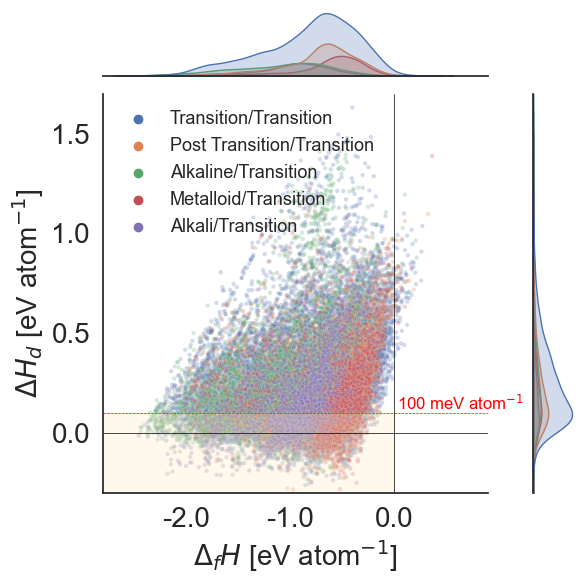

In [4]:
metal_types = ['Transition', 
               'Alkali', 
               'Alkaline', 
               'Post Transition', 
               'Metalloid', 
              ]



metal_combinations = list(itertools.combinations(metal_types, 2))
metal_combinations = [tuple(sorted(combination)) for combination in metal_combinations]
metal_combinations = ['/'.join(combination) for combination in metal_combinations]
for metal_type in metal_types:
    metal_combinations.append(f'{metal_type}/{metal_type}')

fixed_metal_df = df[df['Metal_Type'].apply(lambda x: 'Transition' in x)]

sorted_metal_df = fixed_metal_df.groupby('Metal_Type_Str').size().sort_values(ascending=False).index
fixed_metal_df['Metal_Type_Str'] = pd.Categorical(fixed_metal_df['Metal_Type_Str'], categories=sorted_metal_df, ordered=True)
fixed_metal_df = fixed_metal_df.sort_values('Metal_Type_Str')

sns.set(style="white")
   
g = sns.jointplot(data=fixed_metal_df, x='Ef', y='Hd_MEGNET', hue='Metal_Type_Str', 
              alpha=0.25, s=10)

plt.legend(frameon=False, fontsize=13)


plt.xlabel(r'${\Delta}_f\it{H}$ [eV atom$^{-1}$]', fontsize=20)
plt.ylabel(r'${\Delta}\it{H}_d$ [eV atom$^{-1}$]', fontsize=20)
ax = g.ax_joint

ax.axhline(0, color='black', linestyle='-', linewidth=0.5)
ax.axvline(0, color='black', linestyle='-', linewidth=0.5) 
ax.axhline(0.1, color='red', linestyle='--', linewidth=0.5)  
ax.text(0.025, 0.12, r'''100 meV atom$^{-1}$''', color='red', fontsize=12)
ax.tick_params(labelsize=20)
ax.grid(False)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.xlim(-2.8, 0.9)
plt.ylim(-0.3, 1.7)
plt.fill_betweenx([-0.5, 0.1], 0, -3.5, color='moccasin', alpha=0.25, zorder=1)
plt.tight_layout()

plt.show()

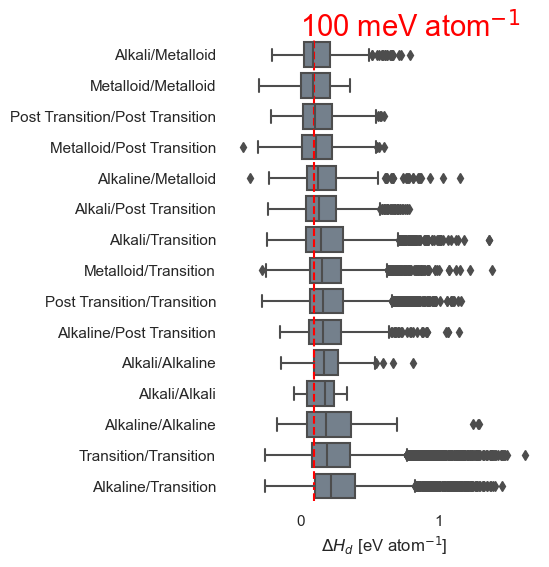

In [5]:
plt.figure(figsize=(4, 6))

plt.axvline(0.1, color='red', linestyle='--') 
median_values = df.groupby('Metal_Type_Str')['Hd_MEGNET'].median()
df_sort_median = df.sort_values(by='Metal_Type_Str', key=lambda x: x.map(median_values))

sns.set(font_scale=1.75)
sns.boxplot(x='Hd_MEGNET', y='Metal_Type_Str', data=df_sort_median, color='slategray')
plt.ylabel('')
plt.xlabel(r'${\Delta}\it{H}_d$ [eV atom$^{-1}$]')
plt.box(False)
plt.text(0, -0.6, r'100 meV atom$^{-1}$', color='red') 

plt.show()

In [6]:
# percent of materials falling under threshold of 100 meV/atom for decomposition energy
filtered_df = df[df['Hd_MEGNET'] < 0.1]

counts = filtered_df['Metal_Type_Str'].value_counts()
counts_initial = df['Metal_Type_Str'].value_counts()

print(counts/counts_initial*100)


Alkali/Alkali                      45.000000
Alkali/Alkaline                    26.050420
Alkali/Metalloid                   50.972763
Alkali/Post Transition             42.825607
Alkali/Transition                  40.547637
Alkaline/Alkaline                  40.458015
Alkaline/Metalloid                 40.992167
Alkaline/Post Transition           33.895447
Alkaline/Transition                24.074553
Metalloid/Metalloid                50.000000
Metalloid/Post Transition          45.659722
Metalloid/Transition               34.117647
Post Transition/Post Transition    46.004843
Post Transition/Transition         32.400856
Transition/Transition              28.721902
Name: Metal_Type_Str, dtype: float64
